In [1]:
# Import Library yang diperlukan
import heapq  # Untuk priority queue
import networkx as nx  # Untuk graph visualization
import matplotlib.pyplot as plt  # Untuk plotting

In [2]:
import heapq
# Function to read graph data from file
def makeGraphDict(filename):
    graph = {}
    with open(filename, 'r') as file:
        for line in file:
            delimeter = line.strip().split(',')
            city1 = delimeter[0].strip()
            city2 = delimeter[1].strip()
            dist = int(delimeter[2].strip())

            if city1 not in graph:
                graph[city1] = {}
            if city2 not in graph:
                graph[city2] = {}

            # Add bidirectional distance
            graph[city1][city2] = dist
            graph[city2][city1] = dist
    return graph



In [3]:
# Function to read heuristic data from file
def makeHeuristicDict(filename):
    heuristic = {}
    with open(filename, 'r') as file:
        for line in file:
            delimeter = line.strip().split(',')
            city = delimeter[0].strip()
            h_value = int(delimeter[1].strip())
            heuristic[city] = h_value
    return heuristic

In [4]:
def aStar(start, end, graph, heuristic):
    path = {}
    distance = {}
    q = PriorityQueue()

    # Start from the source city
    q.push(start, 0)
    distance[start] = 0
    path[start] = None
    expandList = []

    while not q.isEmpty():
        curr = q.pop()
        expandList.append(curr)

        if curr == end:
            break

        for neighbor in graph[curr]:
            graph_cost = distance[curr] + graph[curr][neighbor]

            # If this path to the neighbor is better, update the distance and path
            if neighbor not in distance or graph_cost < distance[neighbor]:
                distance[neighbor] = graph_cost
                f_cost = graph_cost + heuristic[neighbor]
                q.push(neighbor, f_cost)
                path[neighbor] = curr

                # Debugging print to see why the algorithm chooses a path
                print(f"Evaluating {neighbor}: g_cost = {graph_cost}, h_cost = {heuristic[neighbor]}, f_cost = {f_cost}")
                print(f"Current best path to {neighbor}: {path}")

    printOutput(start, end, path, distance, expandList)

In [5]:
def printOutput(start, end, path, distance, expandList):
    finalpath = []
    i = end

    while path.get(i) is not None:
        finalpath.append(i)
        i = path[i]
    finalpath.append(start)
    finalpath.reverse()

    print("Membuat Program A* (A star) sederhana")
    print(f"\t{start} TO {end}")
    print("==============================================================================================================")
    print("Kota yg mungkin dijelajah \t\t: " + str(expandList))
    print("Jumlah kemungkinan kota \t\t: " + str(len(expandList)))
    print("==============================================================================================================")
    print("Kota yg dilewati dg jarak terpendek\t: " + str(finalpath))
    print("Jumlah kota yang dilewati \t\t: " + str(len(finalpath)))
    print("Total Jarak yang ditempuh \t\t: " + str(distance[end]))
    print("==============================================================================================================")


In [6]:
def main():
    # Read data from the sample_data folder in Google Colab
    graph = makeGraphDict('Path.txt')
    heuristic = makeHeuristicDict('HeuristicSurabaya.txt')

    src = "Bandung"
    dst = "Surabaya"
    aStar(src, dst, graph, heuristic)

if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/citiesgraph.txt'

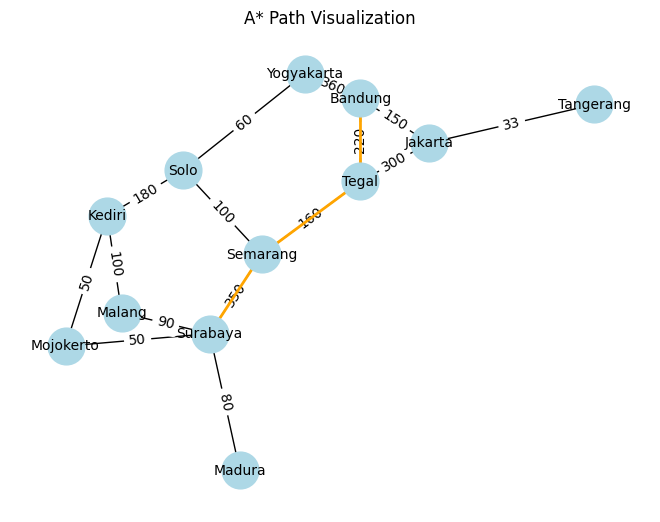

In [ ]:
def visualize_path(graph, path):
    # Create a directed graph
    G = nx.Graph()

    # Add edges from the graph
    for city1, connections in graph.items():
        for city2, distance in connections.items():
            G.add_edge(city1, city2, weight=distance)

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight the A* path
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2)

    plt.title("A* Path Visualization")
    plt.show()

# Assuming you have the graph data loaded from the file and the path found
graph = {
    'Bandung': {'Jakarta': 150, 'Yogyakarta': 360, 'Tegal': 220},
    'Jakarta': {'Tangerang': 33, 'Tegal': 300, 'Bandung': 150},
    'Tangerang': {'Jakarta': 33},
    'Tegal': {'Semarang': 160, 'Bandung': 220},
    'Semarang': {'Solo': 100, 'Surabaya': 310},
    'Yogyakarta': {'Solo': 60},
    'Solo': {'Yogyakarta': 60, 'Semarang': 100, 'Kediri': 180},
    'Kediri': {'Mojokerto': 50, 'Solo': 180, 'Malang': 100},
    'Mojokerto': {'Surabaya': 50},
    'Malang': {'Surabaya': 90},
    'Surabaya': {'Madura': 80},
}

# Example path from Bandung to Surabaya
path = ['Bandung', 'Tegal', 'Semarang', 'Surabaya']  # Replace with actual path found by A*

# Visualize the A* path
visualize_path(graph, path)